<a href="https://colab.research.google.com/github/Nisha0202/Data-Analysis/blob/main/Dataset11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree

In [ ]:
df = pd.read_excel("Dataset on the academic performance of students in 12 programs from a private university.xlsx")
df.head(7)

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,42308,ICE,Female,2010,3.227513,2.875000,3.475000,2.615385,2.898305,3.125000,NaN,KEY,NaN
1,70978,BCH,Female,2010,3.576271,3.250000,4.261905,3.368421,3.469388,3.020833,NaN,ID No,Randomly generated number sequence
2,31602,BCH,Male,2010,2.211454,1.777778,1.979167,1.489583,2.511111,2.187500,NaN,Prog Code,Program of Study
3,63847,BCH,Male,2010,2.702970,2.673913,2.442308,2.000000,2.348315,3.194444,NaN,Gender,Gender
4,30158,BCH,Female,2010,3.881657,3.608696,3.687500,3.625000,4.581395,4.236111,NaN,YoG,Year of Graduation
5,51740,BCH,Male,2010,2.970930,2.659574,2.979167,3.281250,3.066667,3.125000,NaN,CGPA,Overall Cumulative Grade Point Average
6,76075,BCH,Male,2010,3.337209,3.680851,3.000000,3.437500,3.279070,3.020833,NaN,CGPA100,Cumulative Grade Point Average at the end of t...


In [ ]:
target_column_name = "CGPA"

In [ ]:
categorical_target_column = False

In [ ]:
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 3046
Total Number of Columns : 13


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

4.000000    6
3.000000    5
4.337963    4
3.190476    4
3.730594    4
           ..
3.863354    1
3.577640    1
3.269006    1
4.279503    1
4.180723    1
Name: CGPA, Length: 2719, dtype: int64


**Observation**

not categorical data

In [ ]:
#converting this in categorical data

bins = [0, 2, 3, 3.7, 4,5]  # Corrected here

labels = ['0-2', '2-3', '3-3.7', '3.7-4', '4-5']  # Corrected here

df['CGPA'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
df

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,42308,ICE,Female,2010,3-3.7,2.875000,3.475000,2.615385,2.898305,3.125000,NaN,KEY,NaN
1,70978,BCH,Female,2010,3-3.7,3.250000,4.261905,3.368421,3.469388,3.020833,NaN,ID No,Randomly generated number sequence
2,31602,BCH,Male,2010,2-3,1.777778,1.979167,1.489583,2.511111,2.187500,NaN,Prog Code,Program of Study
3,63847,BCH,Male,2010,2-3,2.673913,2.442308,2.000000,2.348315,3.194444,NaN,Gender,Gender
4,30158,BCH,Female,2010,3.7-4,3.608696,3.687500,3.625000,4.581395,4.236111,NaN,YoG,Year of Graduation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3041,64106,PHYG,Female,2013,4-5,4.044444,4.234043,4.161290,4.282051,3.198529,NaN,NaN,NaN
3042,96596,PHYG,Male,2013,2-3,2.355556,3.354167,2.870968,3.020000,2.031250,NaN,NaN,NaN
3043,64982,PHYG,Male,2013,3-3.7,3.422222,3.829787,3.548387,3.820513,3.333333,NaN,NaN,NaN
3044,27052,PHYG,Female,2014,4-5,4.387755,4.702128,4.580645,4.634146,3.515625,NaN,NaN,NaN


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

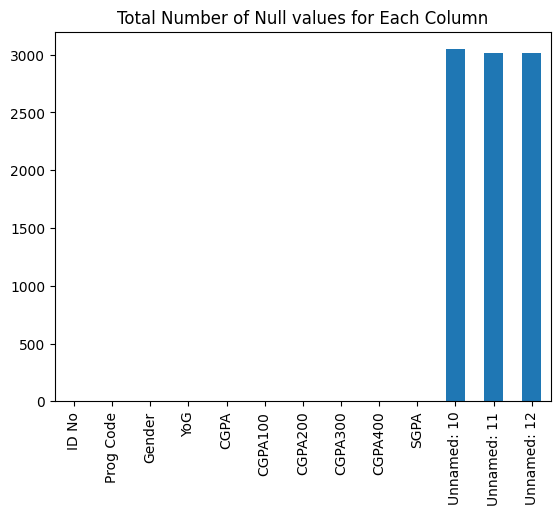

In [ ]:
import matplotlib.pyplot as plt
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")

**Observation**

has 100% null values in last 3 columns that cause of some details were wriiten there as information which is not a part of the dataset data

In [ ]:
droped_column_names = [ "ID No", "SGPA" ,  "Unnamed: 10" , "Unnamed: 11" , "Unnamed: 12"]

df.drop( droped_column_names , axis = 1 ,inplace = True)
df

,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400
0,ICE,Female,2010,3-3.7,2.875000,3.475000,2.615385,2.898305
1,BCH,Female,2010,3-3.7,3.250000,4.261905,3.368421,3.469388
2,BCH,Male,2010,2-3,1.777778,1.979167,1.489583,2.511111
3,BCH,Male,2010,2-3,2.673913,2.442308,2.000000,2.348315
4,BCH,Female,2010,3.7-4,3.608696,3.687500,3.625000,4.581395
...,...,...,...,...,...,...,...,...
3041,PHYG,Female,2013,4-5,4.044444,4.234043,4.161290,4.282051
3042,PHYG,Male,2013,2-3,2.355556,3.354167,2.870968,3.020000
3043,PHYG,Male,2013,3-3.7,3.422222,3.829787,3.548387,3.820513
3044,PHYG,Female,2014,4-5,4.387755,4.702128,4.580645,4.634146


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')

Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


**Observation**

100% unique data(no duplicate).

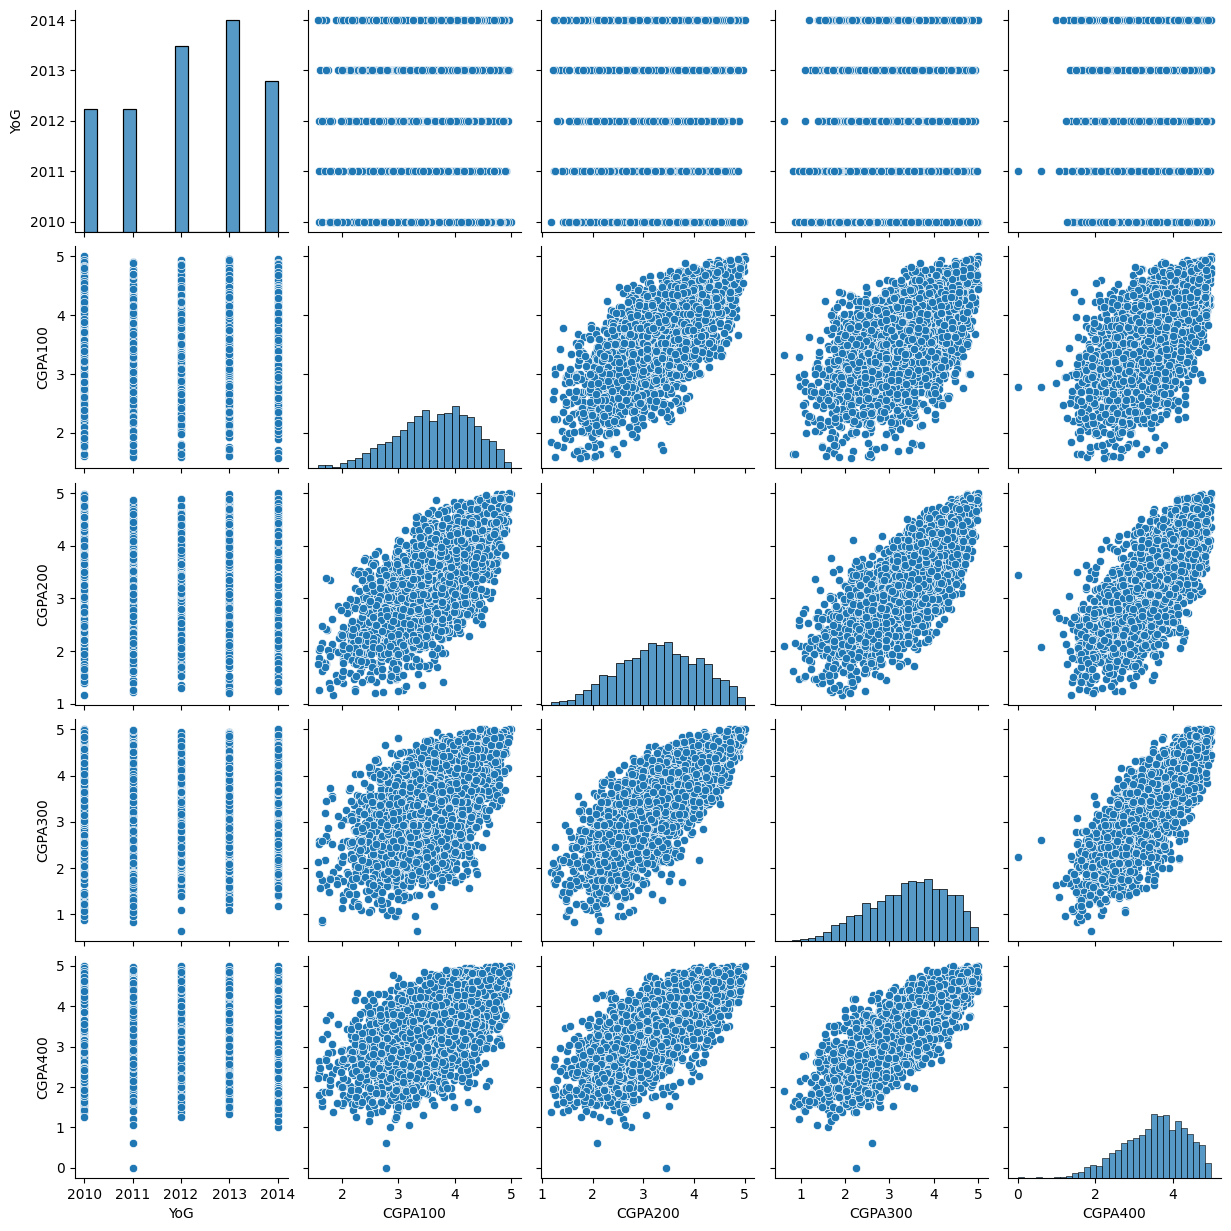

In [ ]:

sns.pairplot( df )

**Observation**
Others data were categorical that's why it's showing one graph.

1. From the histogram we can see CGPA400 and CGPA300 is is left-skewd but CGPA 100and CGPA200 is zero skewed. So, it seems more students perform well in third and fourth year

2. CGPA300 and CGPA400 has linear relation


In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Prog Code  3046 non-null   object  
 1   Gender     3046 non-null   object  
 2   YoG        3046 non-null   int64   
 3   CGPA       3046 non-null   category
 4   CGPA100    3046 non-null   float64 
 5   CGPA200    3046 non-null   float64 
 6   CGPA300    3046 non-null   float64 
 7   CGPA400    3046 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 169.9+ KB


-----------------Unique Values per column--------------------------------




Prog Code      17
Gender          2
YoG             5
CGPA            5
CGPA100       749
CGPA200      1511
CGPA300      1316
CGPA400      1275
dtype: int64

In [ ]:
categorical_columns = ["Prog Code", "Gender", "YoG", "CGPA"]
numeric_columns = [ "YoG", "CGPA100", "CGPA200", "CGPA300", "CGPA400"]

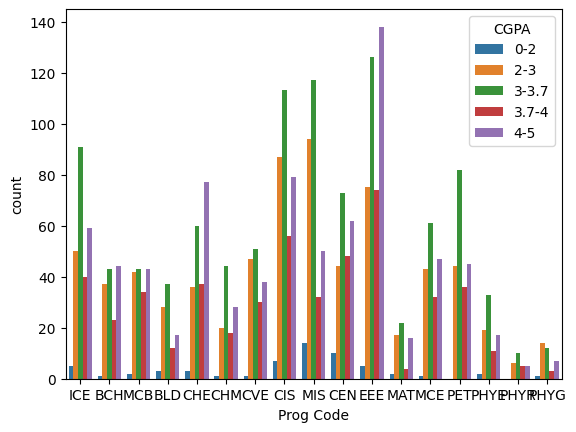

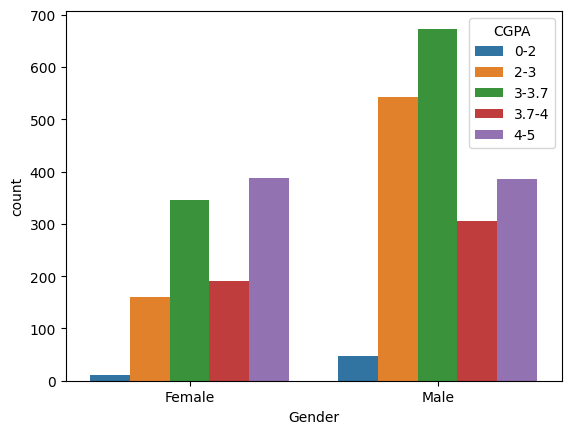

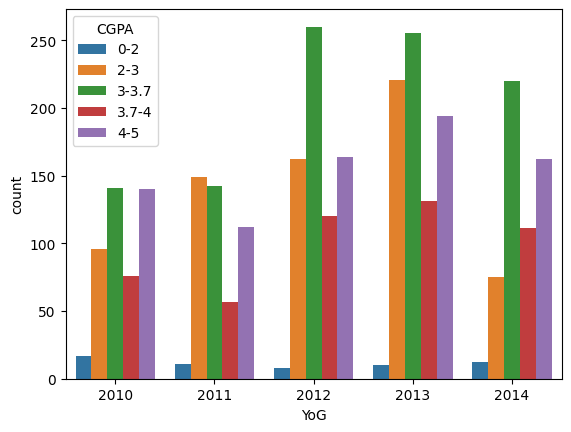

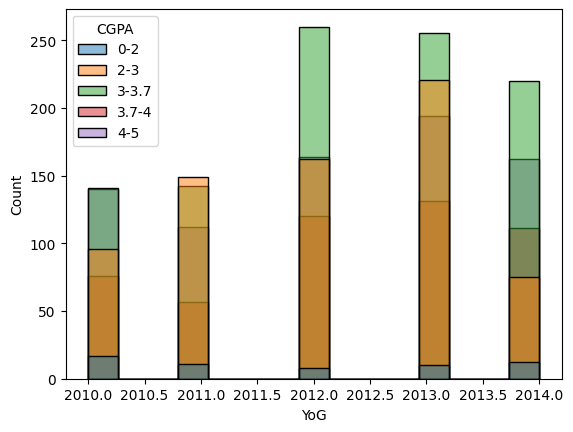

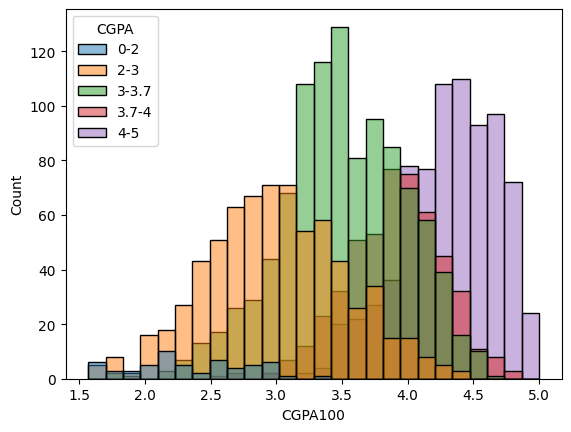

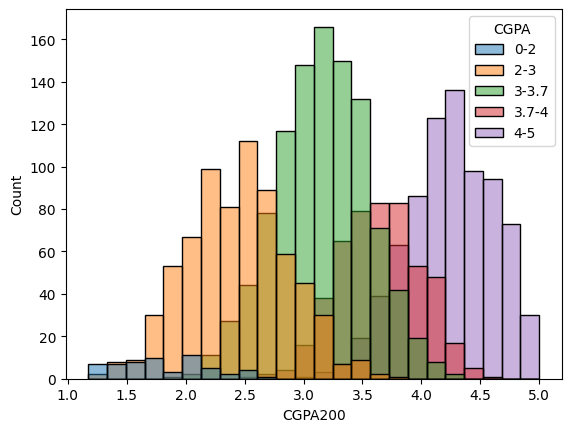

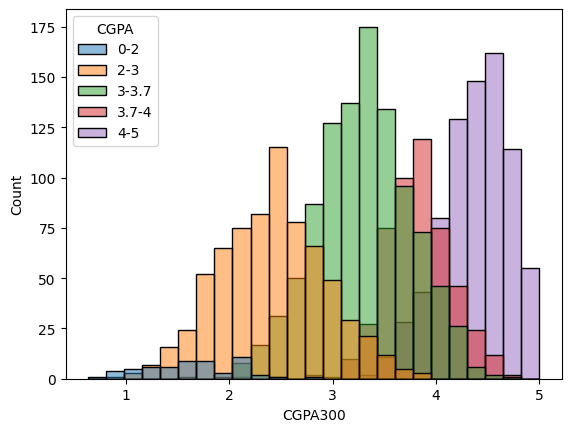

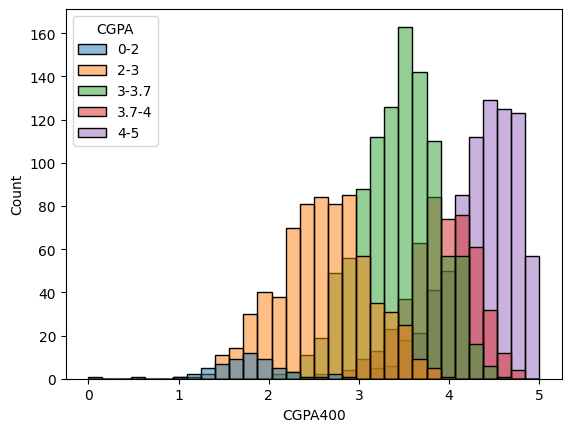

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:

      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()

**Obsevation**

1. EEE department have the most highest CGPA holders. MSG department hast the most lowest CGPA holders.
2. if we see the in range 4-5 female and male are in equal percentage. But for average CGPA more males are there.
3. Those who have good CGPA performed well in all four years.




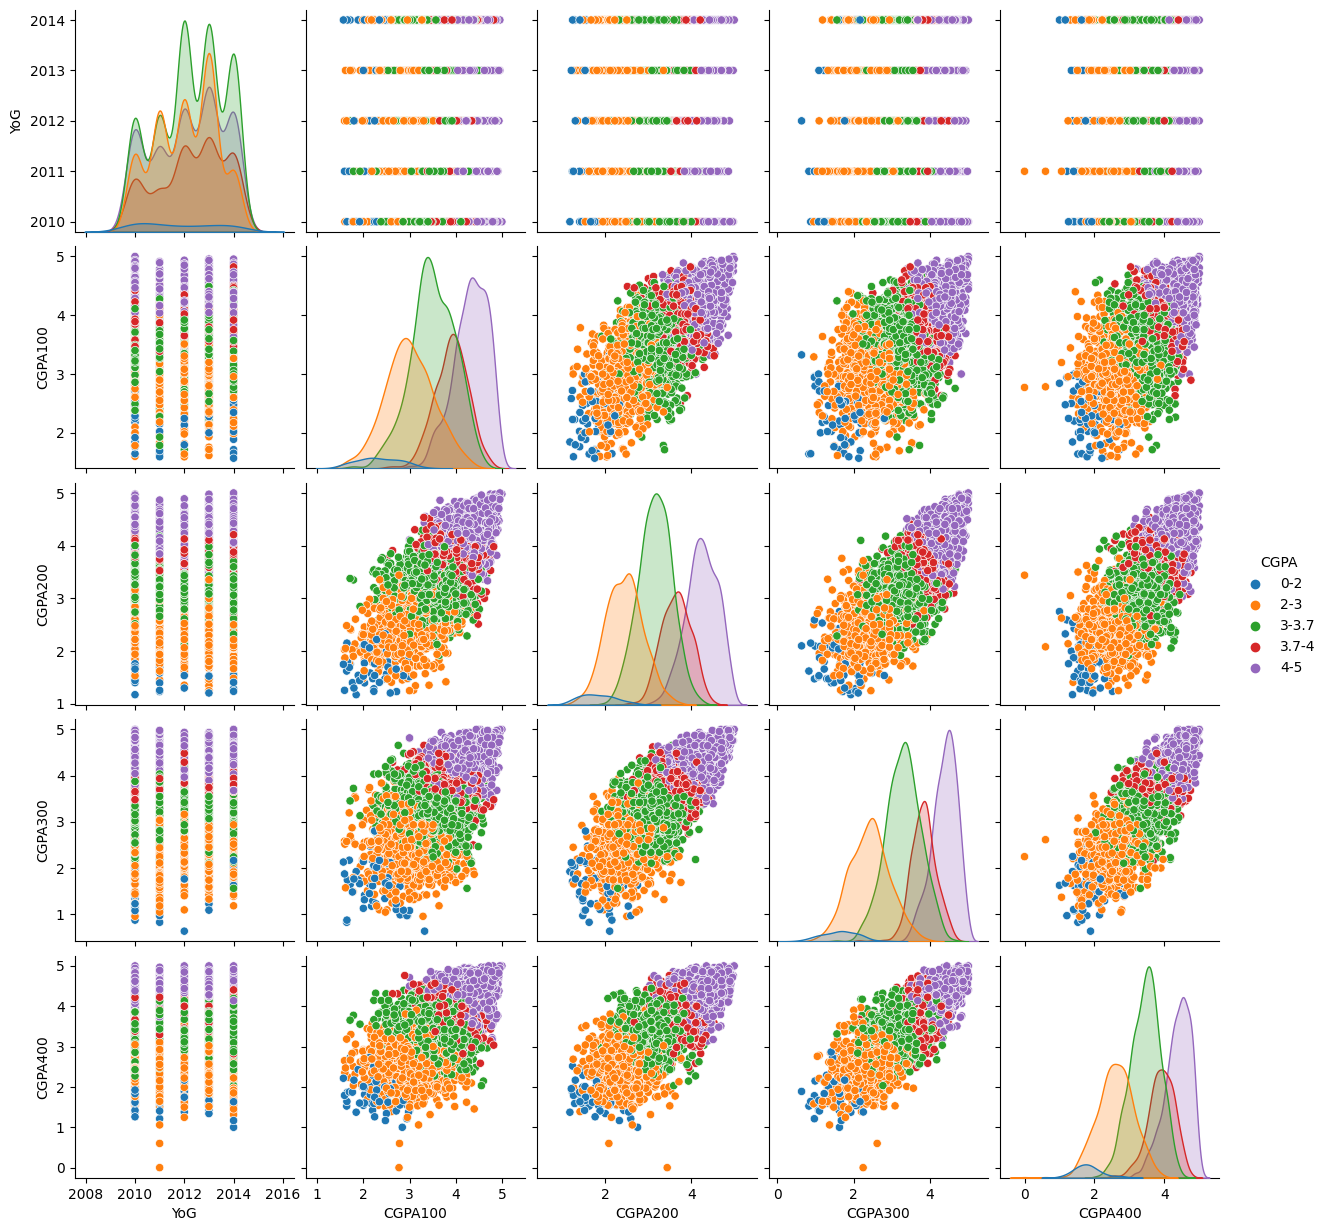

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

**Observation**

Getting same observations as above.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Prog Code  3046 non-null   object  
 1   Gender     3046 non-null   object  
 2   YoG        3046 non-null   int64   
 3   CGPA       3046 non-null   category
 4   CGPA100    3046 non-null   float64 
 5   CGPA200    3046 non-null   float64 
 6   CGPA300    3046 non-null   float64 
 7   CGPA400    3046 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 169.9+ KB


<Axes: >

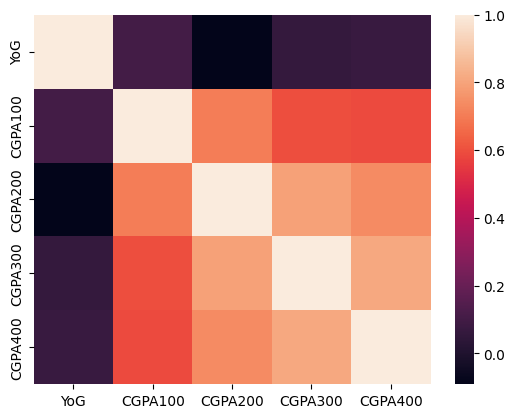

In [ ]:
sns.heatmap(df.corr( numeric_only =  True))

**Observation**

CGPA400 has strong positive relation with year. Means those who graduated in 2014 has performed well in their fourth year.


## SVM

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.87      0.94      0.91       221
           2       0.90      0.92      0.91       295
           3       0.80      0.81      0.81       142
           4       0.96      0.94      0.95       236

    accuracy                           0.89       914
   macro avg       0.71      0.72      0.71       914
weighted avg       0.87      0.89      0.88       914



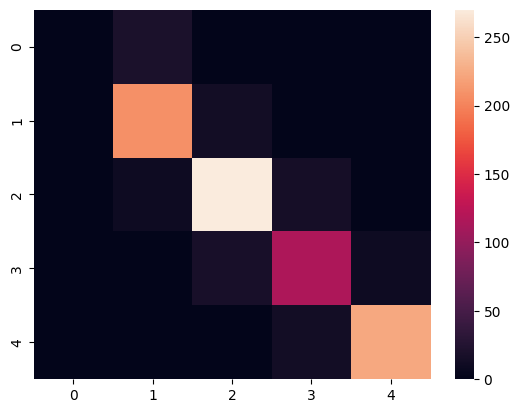

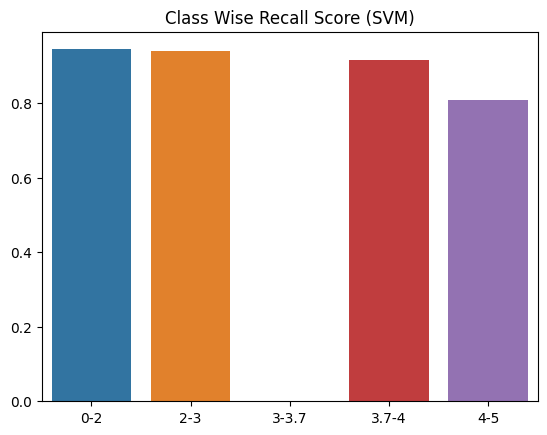

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


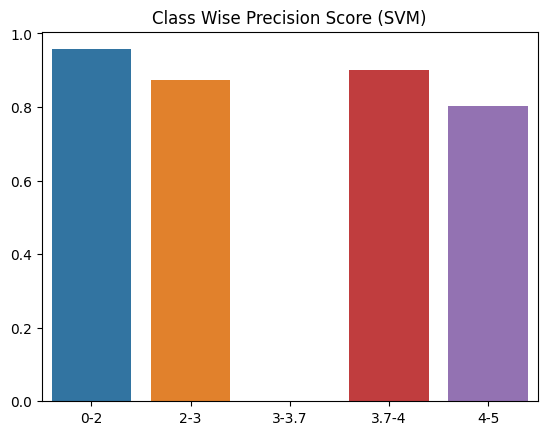

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

**Observation**

the model has high precision, recall, and F1-score for classes 1, 2, 3, and 4, indicating that it performs well on these classes. But, for class 0, all these scores are 0, suggesting that the model fails to correctly predict this class. The overall accuracy of the model is 0.89, which means it correctly predicts 89% of all cases.



              precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.86      0.86      0.86       221
           2       0.84      0.85      0.85       295
           3       0.70      0.67      0.69       142
           4       0.91      0.92      0.91       236

    accuracy                           0.84       914
   macro avg       0.77      0.77      0.77       914
weighted avg       0.84      0.84      0.84       914



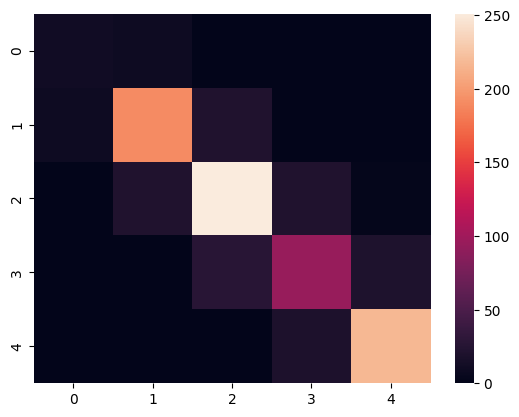

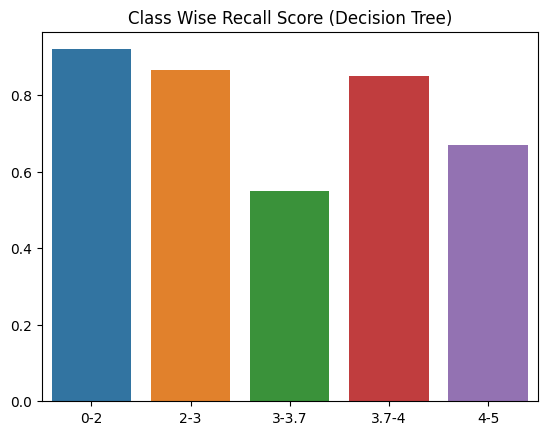

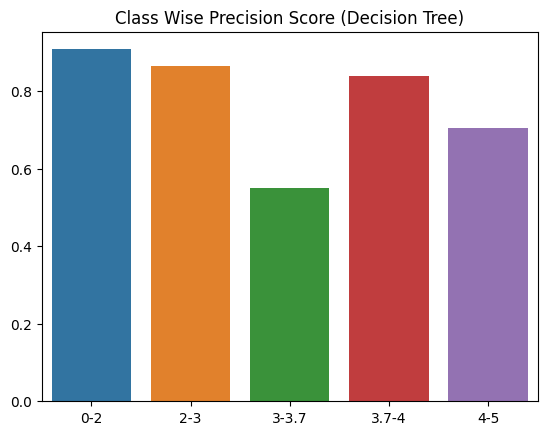

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

**Observation**

The model has varying precision, recall, and F1-score for different classes, indicating that it performs differently on these classes. The overall accuracy of the model is 0.84, which means it correctly predicts 84% of all cases.